# Data Cleaning 

### Frist I import the important liberaries 

In [515]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings 
warnings.filterwarnings('ignore')

In [516]:
df = pd.read_csv(r"all_bikez_curated (1).csv")
df.head()

,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm)
0,acabion,da vinci 650-vi,2011,Prototype / concept model,NaN,804.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,Chain,420.0,NaN,NaN
1,acabion,gtbo 55,2007,Sport,1300.0,541.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,360.0,NaN,NaN
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN
4,acabion,gtbo 70,2007,Prototype / concept model,1300.0,689.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,300.0,NaN,NaN


In [517]:
df.columns 

Index(['Brand', 'Model', 'Year', 'Category', 'Displacement (ccm)',
       'Power (hp)', 'Engine cylinder', 'Engine stroke', 'Gearbox',
       'Fuel capacity (lts)', 'Fuel system', 'Fuel control', 'Cooling system',
       'Transmission type', 'Dry weight (kg)', 'Wheelbase (mm)',
       'Seat height (mm)'],
      dtype='object')

In [518]:
df.dtypes

Brand                   object
Model                   object
Year                    object
Category                object
Displacement (ccm)     float64
Power (hp)             float64
Engine cylinder         object
Engine stroke           object
Gearbox                 object
Fuel capacity (lts)    float64
Fuel system             object
Fuel control            object
Cooling system          object
Transmission type       object
Dry weight (kg)        float64
Wheelbase (mm)         float64
Seat height (mm)       float64
dtype: object

### Cheack if there duplicated rows and if there I will drop them

In [520]:
df.duplicated().sum()

8

In [521]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [522]:
df.isna().sum()

Brand                      0
Model                     28
Year                       0
Category                   0
Displacement (ccm)      1029
Power (hp)             12380
Engine cylinder           16
Engine stroke             11
Gearbox                 5807
Fuel capacity (lts)     6793
Fuel system            10648
Fuel control           16506
Cooling system          4219
Transmission type       5628
Dry weight (kg)        16007
Wheelbase (mm)         13007
Seat height (mm)       14311
dtype: int64

### remove the missing values in ['Model','Engine cylinder', 'Engine stroke'] columns

In [538]:
# remove the missing values in ['Model','Engine cylinder', 'Engine stroke'] columns
df.dropna(subset=['Model','Engine cylinder', 'Engine stroke'], inplace=True)
df.isna().sum()

Brand                      0
Model                      0
Year                       0
Category                   0
Displacement (ccm)         0
Power (hp)                 0
Engine cylinder            0
Engine stroke              0
Gearbox                 3134
Fuel capacity (lts)     3355
Fuel system             7781
Fuel control            8181
Cooling system          2276
Transmission type       2905
Dry weight (kg)        10176
Wheelbase (mm)          9135
Seat height (mm)        9624
dtype: int64

### I will start with 'Year' column 

In [524]:
df['Year'] = df['Year'].astype('str').str.extract(r'(\d{1,4})') # convert to string and extract the number only
df['Year'] = df['Year'].astype('int') # convert to int 
df['Year'].unique()

array([2011, 2007, 2021, 2016, 2018, 2020, 2022, 1923, 1924, 1925, 1926,
       1927, 2009, 2010, 2014, 2008, 2019, 2012, 2013, 2040, 1957, 1958,
       1955, 1956, 1952, 1953, 1954, 1959, 1960, 2077, 2003, 3019, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1971, 1972, 1970,
       1974, 2005, 2015, 2006, 1922, 1928, 1949, 1950, 1951, 2001, 2017,
       1986, 1999, 1985, 1987, 1996, 1991, 1988, 1989, 1990, 1992, 2004,
       2002, 1997, 1998, 2000, 1993, 1984, 1995, 1948, 1937, 1938, 1931,
       1901, 1902, 1903, 1913, 1914, 1915, 1916, 1918, 1932, 1933, 1934,
       1935, 1936, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1898, 1910, 1929, 1975, 1976, 1973, 1977, 1978, 1979, 1980, 1982,
       1983, 1981, 1917, 1919, 1994, 1930, 1897, 1920, 1921, 1899, 1900,
       1904, 1911, 1912, 1896, 1909, 1905, 1906, 1907, 1908, 1894, 1895])

In [525]:
print(df.loc[df['Year'] > 2025,'Year']) # print the years that can not be logic

58     2040
133    2077
170    3019
Name: Year, dtype: int32


In [526]:
# convert the years to logic dates
df.loc[df['Year'] == 2040, 'Year'] = 2004  
df.loc[df['Year'] == 2077, 'Year'] = 2007
df.loc[df['Year'] == 3019, 'Year'] = 2019
print(df.loc[df['Year'] > 2025,'Year'])

Series([], Name: Year, dtype: int32)


In [527]:
 # convert year column to date type
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')  # Convert to datetime
df['Year'] = df['Year'].dt.year  # Extract only the year

### 'Displacement (ccm)' column 

In [529]:
df['Displacement (ccm)'].describe() # get describtion to 'Displacement (ccm)'

count    37506.000000
mean       552.398731
std        545.370040
min         25.000000
25%        125.000000
50%        397.000000
75%        805.000000
max       8277.000000
Name: Displacement (ccm), dtype: float64

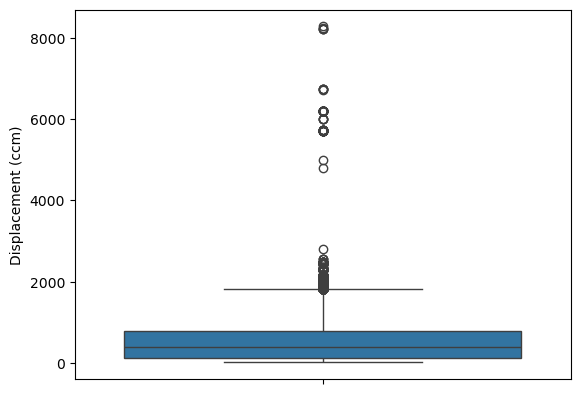

In [530]:
# visulize the 'Displacement (ccm)' column to be clear with values
sns.boxplot(data = df['Displacement (ccm)'])
plt.show() 

In [531]:
# I will remove the values with more than 2500 cc to be more logic
df = df[df['Displacement (ccm)']<=2500]
df['Displacement (ccm)'].describe()

count    37423.000000
mean       540.331237
std        479.767798
min         25.000000
25%        125.000000
50%        396.000000
75%        803.000000
max       2491.000000
Name: Displacement (ccm), dtype: float64

In [532]:
df.isna().sum()

Brand                      0
Model                     28
Year                       0
Category                   0
Displacement (ccm)         0
Power (hp)             12185
Engine cylinder           16
Engine stroke             11
Gearbox                 5417
Fuel capacity (lts)     5787
Fuel system             9618
Fuel control           15440
Cooling system          3984
Transmission type       5073
Dry weight (kg)        15590
Wheelbase (mm)         12587
Seat height (mm)       13865
dtype: int64

### 'Power (hp)' column

In [534]:
# get describtion to 'Power (hp)' column
df['Power (hp)'].describe()

count    25238.000000
mean        50.327011
std         47.187112
min          0.500000
25%         12.500000
50%         32.000000
75%         78.000000
max        689.000000
Name: Power (hp), dtype: float64

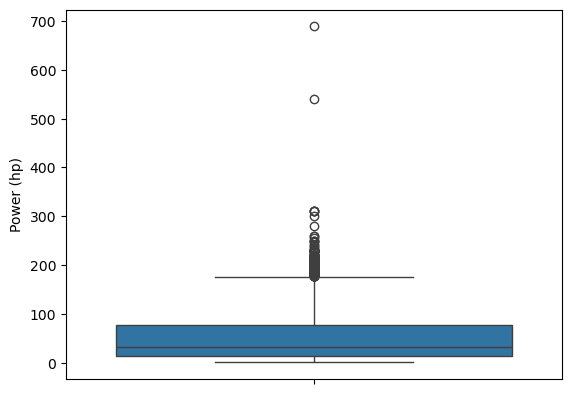

In [535]:
# visulize the 'Power (hp)' column to can treat with it
sns.boxplot(data = df['Power (hp)'])
plt.show()

In [536]:
# remove the values with less than 5 and more than 350 (hp)
df = df[(df['Power (hp)']<=350)&(df['Power (hp)']>=5)]
df['Power (hp)'].describe()

count    23537.000000
mean        53.670404
std         46.791155
min          5.000000
25%         15.000000
50%         39.500000
75%         83.100000
max        310.000000
Name: Power (hp), dtype: float64

In [537]:
df.isna().sum()

Brand                      0
Model                     14
Year                       0
Category                   0
Displacement (ccm)         0
Power (hp)                 0
Engine cylinder           13
Engine stroke              8
Gearbox                 3143
Fuel capacity (lts)     3371
Fuel system             7792
Fuel control            8203
Cooling system          2287
Transmission type       2913
Dry weight (kg)        10183
Wheelbase (mm)          9155
Seat height (mm)        9637
dtype: int64

### 'Engine cylinder' column

In [540]:
# get the values in 'Engine cylinder' column to see if there an unusually values
df['Engine cylinder'].unique()

array(['Single cylinder', 'Twin', 'V2', 'Four cylinder boxer', 'V4',
       'Square four cylinder', 'In-line four', 'In-line six',
       'In-line three', 'Six cylinder boxer', 'Two cylinder boxer', 'V8',
       'Diesel', 'Single disk Wankel', 'V3', 'V6', 'Dual disk Wankel'],
      dtype=object)

### 'Gearbox' column

In [542]:
df['Gearbox'].unique()

array(['Automatic', '5-speed', nan, '4-speed', '3-speed', '6-speed',
       '1-speed', '7-speed', '4-speed with reverse', '2-speed',
       '2-speed automatic', '10-speed', '5-speed with reverse',
       '6-speed with reverse', '3-speed automatic', '8-speed'],
      dtype=object)

In [543]:
# remove this ['10-speed', '8-speed','7-speed'] values 
df = df[~df['Gearbox'].isin(['10-speed', '8-speed','7-speed'])]
df['Gearbox'].unique()

array(['Automatic', '5-speed', nan, '4-speed', '3-speed', '6-speed',
       '1-speed', '4-speed with reverse', '2-speed', '2-speed automatic',
       '5-speed with reverse', '6-speed with reverse',
       '3-speed automatic'], dtype=object)

In [544]:
df['Gearbox'] = df['Gearbox'].astype('category')

### 'Fuel capacity (lts)' column 

In [546]:
df['Fuel capacity (lts)'].describe()

count    20134.000000
mean        14.816877
std          5.471153
min          1.000000
25%         11.000000
50%         15.000000
75%         18.000000
max         52.000000
Name: Fuel capacity (lts), dtype: float64

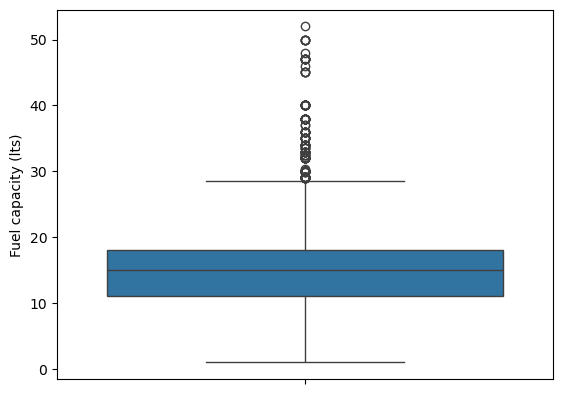

In [547]:
# visulize 'Fuel capacity (lts)'
sns.boxplot(df['Fuel capacity (lts)'])
plt.show()

In [548]:
# Fill missing values with the mean value 
df['Fuel capacity (lts)'] = df['Fuel capacity (lts)'].fillna(df['Fuel capacity (lts)'].mean())
df['Fuel capacity (lts)'].isna().sum()

0

### 'Fuel system' column 

In [550]:
df['Fuel system'].unique()

array(['Carburettor', 'Injection. EFI', nan, ...,
       'Carburettor. Bing 20mm', 'Carburettor. Amal 22mm',
       'Carburettor. Bing 19mm (1/19/36)'], dtype=object)

In [551]:
df['Fuel system'] = df['Fuel system'].astype('category')

### 'Fuel control' column

In [553]:
df['Fuel control'].unique()

array(['Overhead Valves (OHV)', 'Overhead Cams (OHC)', nan,
       'Single Overhead Cams (SOHC)',
       'Double Overhead Cams/Twin Cam (DOHC)', 'Port control',
       'Rotary valves', 'Membrane & variable discharge openings',
       'Membrane', 'Desmodromic valve control', 'Sidevalves',
       'Standing valves', 'Pushrods', 'Membrane & power valve',
       'Rotary valves & variable discharge openings'], dtype=object)

In [554]:
df['Fuel control'] = df['Fuel control'].astype('category')

### 'Cooling system' column 

In [556]:
df['Cooling system'].unique()

array(['Air', 'Liquid', 'Liquids', 'the air', nan, 'air', 'Oil & air',
       'Oil and air'], dtype=object)

In [557]:
df['Cooling system'] = df['Cooling system'].str.lower() # Make all values in lower case
df['Cooling system'] = df['Cooling system'].str.replace('the air','air') # replace 'the air' with 'air'
df['Cooling system'] = df['Cooling system'].str.replace('liquids','liquid') # replace 'Liquids' with 'liquid'
df['Cooling system'] = df['Cooling system'].str.replace('oil & air','oil and air') # replace 'oil & air' with 'oil and air'
df['Cooling system'].unique()

array(['air', 'liquid', nan, 'oil and air'], dtype=object)

### 'Transmission type' column

In [559]:
df['Transmission type'].unique()

array(['Chain', 'Belt', nan, 'Shaft drive'], dtype=object)

### 'Dry weight (kg)' column 

In [561]:
# describe the 'Dry weight (kg)' column 
df['Dry weight (kg)'].describe()

count    13331.000000
mean       177.846606
std         75.157797
min         15.500000
25%        125.000000
50%        168.000000
75%        206.000000
max       1000.000000
Name: Dry weight (kg), dtype: float64

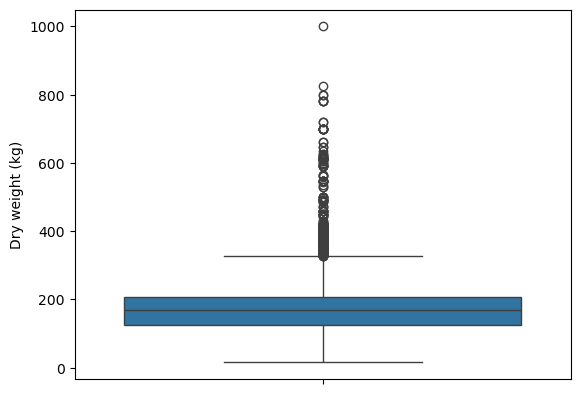

In [562]:
# visulize the 'Dry weight (kg)' values 
sns.boxplot(df['Dry weight (kg)'])
plt.show()

In [563]:
# remove the values more than 600 Kg
df = df[df['Dry weight (kg)'] < 600]
df['Dry weight (kg)'].describe()

count    13287.000000
mean       176.192752
std         69.401587
min         15.500000
25%        125.000000
50%        168.000000
75%        205.000000
max        598.000000
Name: Dry weight (kg), dtype: float64

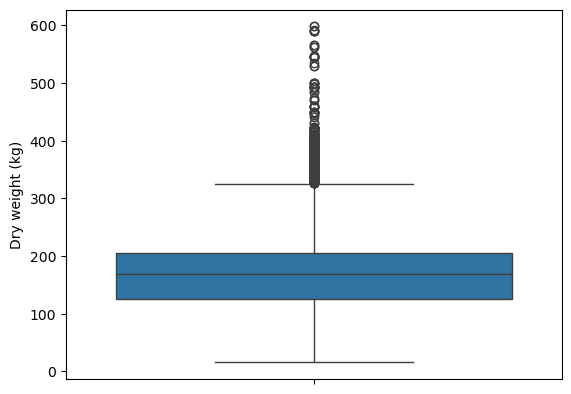

In [564]:
# visulize the 'Dry weight (kg)' values 
sns.boxplot(df['Dry weight (kg)'])
plt.show()

### 'Wheelbase (mm)' column

In [566]:
df['Wheelbase (mm)'].describe()

count    9493.000000
mean     1440.035184
std       151.904239
min       745.000000
25%      1353.000000
50%      1430.000000
75%      1510.000000
max      2261.000000
Name: Wheelbase (mm), dtype: float64

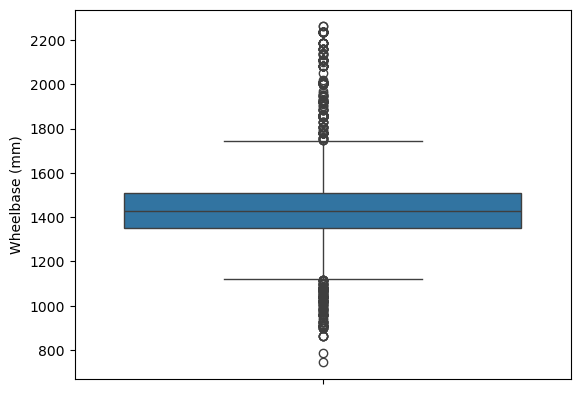

In [567]:
sns.boxplot(df['Wheelbase (mm)'])
plt.show()

### 'Seat height (mm)' column 

In [569]:
df['Seat height (mm)'].describe()

count    9601.000000
mean      787.211020
std       119.925498
min        87.000000
25%       760.000000
50%       790.000000
75%       820.000000
max      7501.000000
Name: Seat height (mm), dtype: float64

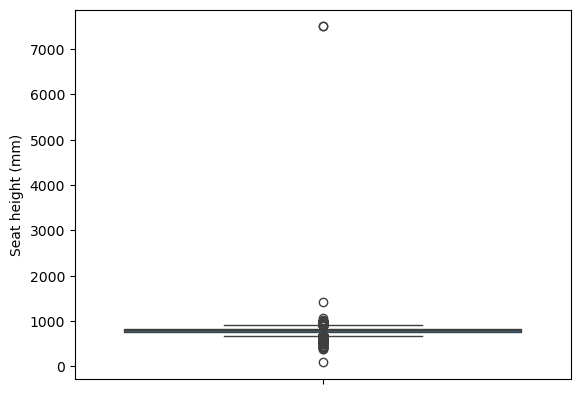

In [570]:
sns.boxplot(df['Seat height (mm)'])
plt.show()

In [571]:
# remove the values more than 2000 mm 
df = df[df['Seat height (mm)'] < 1200]
# remove the values less than 400 mm
df = df[df['Seat height (mm)'] > 400]
df['Seat height (mm)'].describe()

count    9593.000000
mean      785.982383
std        69.538806
min       425.000000
25%       760.000000
50%       790.000000
75%       820.000000
max      1060.000000
Name: Seat height (mm), dtype: float64

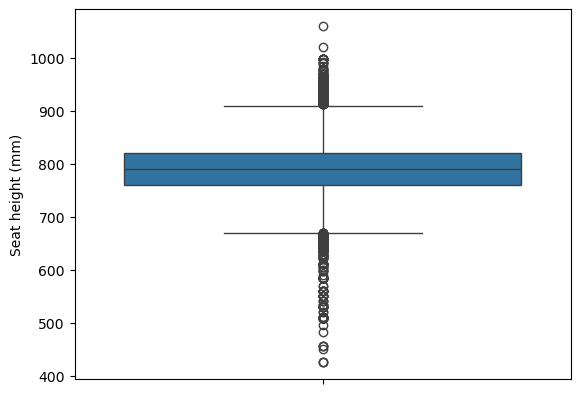

In [572]:
sns.boxplot(df['Seat height (mm)'])
plt.show()

## Summary

1. cheak the types of the column
2. drop dublicated values
3. remove missing values
4. remove the unlogic values in year column and then converted to date type
5. remove the unlogic values in rest of column and visulize them in boxplot